In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

x, h = np.linspace(0, 5, 1000, retstep=True)

In [105]:
#Зададим начальные условия для первого и второго случая
y_fun1 = lambda x, y: y
y_first1 = 0.5

y_fun2 = lambda x, y: -y
y_first2 = 1

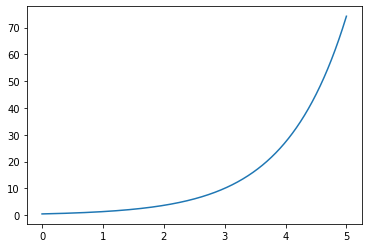

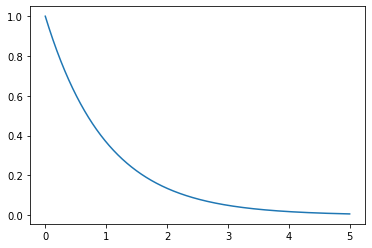

In [127]:
# Истинное решение

#Первый случай
ans_true1 = odeint(lambda y, x: y, 0.5, x)
plt.plot(x, ans_true1)
plt.show()

#Второй случай
ans_true2 = odeint(lambda y, x: -y, 1, x)
plt.plot(x, ans_true2)
None

In [133]:
#Метод Рунге-Кутта 4 порядка

def Run_Kut(x, y_first, fun, h):
  y = [y_first]
  for n in range(len(x) - 1):
    k1 = h * fun(x[n], y[n])
    k2 = h * fun((x[n] + 1/2 * h), (y[n] + 1/2 * k1))
    k3 = h * fun((x[n] + 1/2 * h), (y[n] + 1/2 * k2))
    k4 = h * fun((x[n] + 1/2 * h), (y[n] + 1/2 * k3))
    y_next = y[n] + 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)
    y.append(y_next)
  return np.array(y)

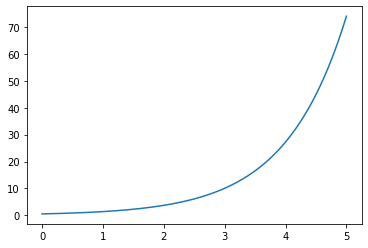

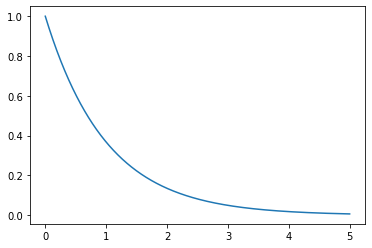

In [135]:
#Строим графики Для Рунге-Кутта
y_ans1 = Run_Kut(x, y_first1, y_fun1, h)
plt.plot(x, y_ans1)
plt.show()

y_ans2 = Run_Kut(x, y_first2, y_fun2, h)
plt.plot(x, y_ans2)
plt.show()
None

In [136]:
#Метод Адамса-Бэшфорта

def Ad_Besh(x, y_first, y_fun, h):
  y = [y_first]
  for n in range(len(x) - 1):
    y_step = y[n] + h/720 * 1901 * y_fun(x[n], y[n])
    if len(y) > 1:
      y_step -= h/720 * 2774 * y_fun(x[n-1], y[n-1])
    if len(y) > 2:
      y_step += h/720 * 2616 * y_fun(x[n-2], y[n-2])
    if len(y) > 3:
      y_step -= h/720 * 1274 * y_fun(x[n-3], y[n-3])
    if len(y) > 4:
      y_step += h/720 * 251 * y_fun(x[n-4], y[n-4])
    y.append(y_step)
  return np.array(y)

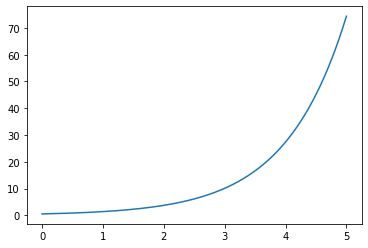

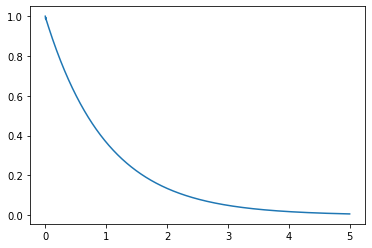

In [137]:
# Строим графики для Адамса-Бэшфорта
y_ans3 = Ad_Besh(x, y_first1, y_fun1, h)
plt.plot(x, y_ans3)
plt.show()

y_ans4 = Ad_Besh(x, y_first2, y_fun2, h)
plt.plot(x, y_ans4)
plt.show()

None

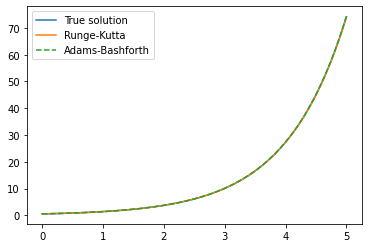

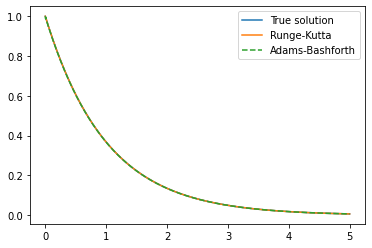

In [155]:
# наложение 3х способов

# Вариант 1
fig, ax = plt.subplots()
ax.plot(x, ans_true1, label='True solution')
ax.plot(x, y_ans1, '-', label='Runge-Kutta')
ax.plot(x, y_ans3, '--', label='Adams-Bashforth')
leg = ax.legend()
fig.show()

# Вариант 2
fig, ax = plt.subplots()
ax.plot(x, ans_true2, label='True solution')
ax.plot(x, y_ans2, '-', label='Runge-Kutta')
ax.plot(x, y_ans4, '--', label='Adams-Bashforth')
leg = ax.legend()
fig.show()
None

In [139]:
#Шум
#Рунге-Кутт
abs_noise_kutt1 = abs(ans_true1 - y_ans1[:, np.newaxis])
rel_noise_kutt1 = abs((ans_true1 - y_ans1[:, np.newaxis])/ans_true1)
abs_noise_kutt2 = abs(ans_true2 - y_ans2[:, np.newaxis])
rel_noise_kutt2 = abs((ans_true2 - y_ans2[:, np.newaxis])/ans_true2)

#Адамс-Бэшфорт
abs_noise_besh1 = abs(ans_true1 - y_ans3[:, np.newaxis])
rel_noise_besh1 = abs((ans_true1 - y_ans3[:, np.newaxis])/ans_true1)
abs_noise_besh2 = abs(ans_true2 - y_ans4[:, np.newaxis])
rel_noise_besh2 = abs((ans_true2 - y_ans4[:, np.newaxis])/ans_true2)

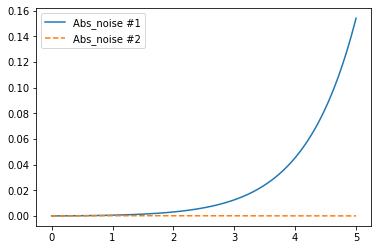

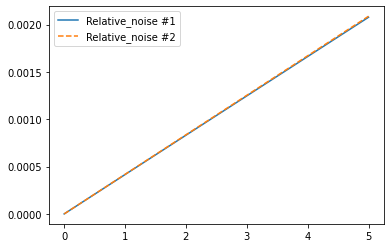

In [157]:
# Строим шумы Рунге-Кутт
# Абсолютный шум
fig, ax = plt.subplots()
ax.plot(x, abs_noise_kutt1, label='Abs_noise #1')
ax.plot(x, abs_noise_kutt2, '--', label='Abs_noise #2')
leg = ax.legend()
fig.show()

# Относительный шум
fig, ax = plt.subplots()
ax.plot(x, rel_noise_kutt1, label='Relative_noise #1')
ax.plot(x, rel_noise_kutt2, '--', label='Relative_noise #2')
leg = ax.legend()
fig.show()
None

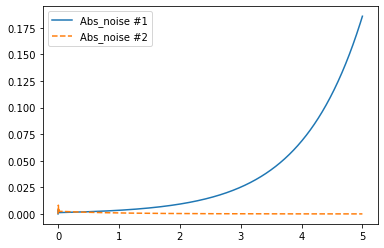

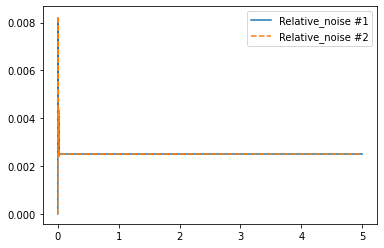

In [158]:
# Строим шумы Адамс-Бэшфорт
# Абсолютный шум
fig, ax = plt.subplots()
ax.plot(x, abs_noise_besh1, label='Abs_noise #1')
ax.plot(x, abs_noise_besh2, '--', label='Abs_noise #2')
leg = ax.legend()
fig.show()

fig, ax = plt.subplots()
ax.plot(x, rel_noise_besh1, label='Relative_noise #1')
ax.plot(x, rel_noise_besh2, '--', label='Relative_noise #2')
leg = ax.legend()
fig.show()
None